# Assignment 2_3

**1. import the module**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys
import os

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


**2. Read the data**

In [4]:
path = os.getenv("DFDATA")

In [5]:
df = pd.read_csv(path+"/wc5n-ie7a/1476480727/wc5n-ie7a.csv")
df_time = pd.read_csv(path+"/wc5n-ie7a/1476480727/wc5n-ie7a.csv")
df.head()

,Created Date,Descriptor,Incident Zip,Borough,Latitude,Longitude
0,08/10/2016 05:15:00 AM,12 Dead Animals,NaN,STATEN ISLAND,NaN,NaN
1,08/11/2016 09:28:00 PM,12 Dead Animals,11103.0,QUEENS,40.762561,-73.917194
2,03/30/2012 03:43:00 PM,12 Dead Animals,10314.0,STATEN ISLAND,40.600945,-74.131174
3,10/04/2016 01:32:00 PM,12 Dead Animals,11229.0,BROOKLYN,40.599340,-73.934411
4,10/04/2016 08:27:00 AM,12 Dead Animals,10017.0,MANHATTAN,40.756363,-73.977852


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56449 entries, 0 to 56448
Data columns (total 6 columns):
Created Date    56449 non-null object
Descriptor      56449 non-null object
Incident Zip    53392 non-null float64
Borough         56449 non-null object
Latitude        53327 non-null float64
Longitude       53327 non-null float64
dtypes: float64(3), object(3)
memory usage: 2.6+ MB


In [7]:
index = [df.columns]

In [8]:
index[0]

Index(['Created Date', 'Descriptor', 'Incident Zip', 'Borough', 'Latitude',
       'Longitude'],
      dtype='object')

In [9]:
len(index[0])

6

**3. Remove the other columns with 2 methods**

Method 1. use df.drop("column name", axis=1, inplace=True)

In [10]:
for i in range(len(index[0]) - 2):
    df.drop(index[0][i],axis=1,inplace=True)
    
df.head()

,Latitude,Longitude
0,NaN,NaN
1,40.762561,-73.917194
2,40.600945,-74.131174
3,40.599340,-73.934411
4,40.756363,-73.977852


Method 2. select the 2 columns, and reassign to new dataframe

In [11]:
df_number = df[["Latitude","Longitude"]]

In [12]:
df_number.head()

,Latitude,Longitude
0,NaN,NaN
1,40.762561,-73.917194
2,40.600945,-74.131174
3,40.599340,-73.934411
4,40.756363,-73.977852


# Figure1 : Latitude and Longitude in NY with Seaborn(point)

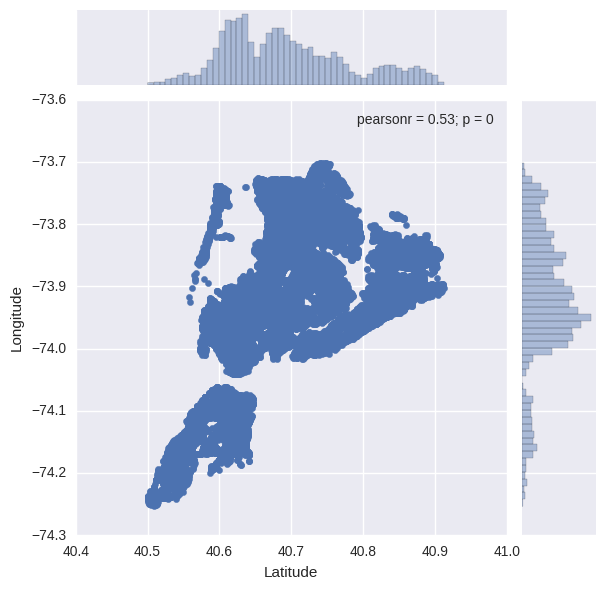

In [13]:
sns.jointplot(x="Latitude",y="Longitude",data=df_number,kind="scatter")

# Figure2 : Latitude and Longitude in NY with Seaborn(Hex)

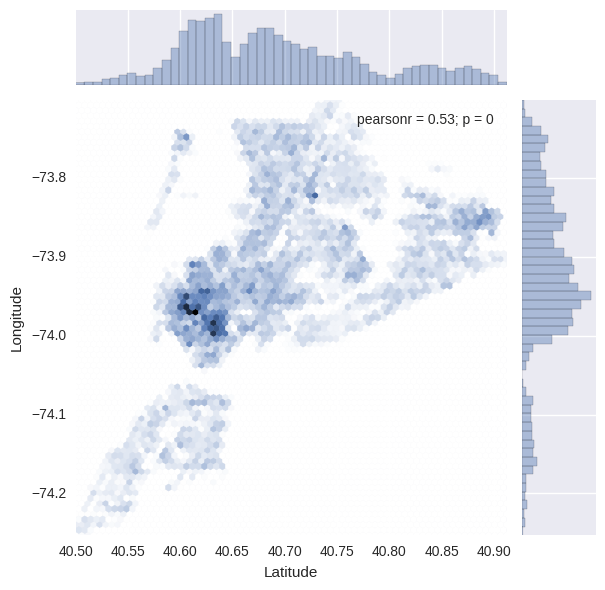

In [14]:
sns.jointplot(x="Latitude",y="Longitude",data=df_number,kind="hex")

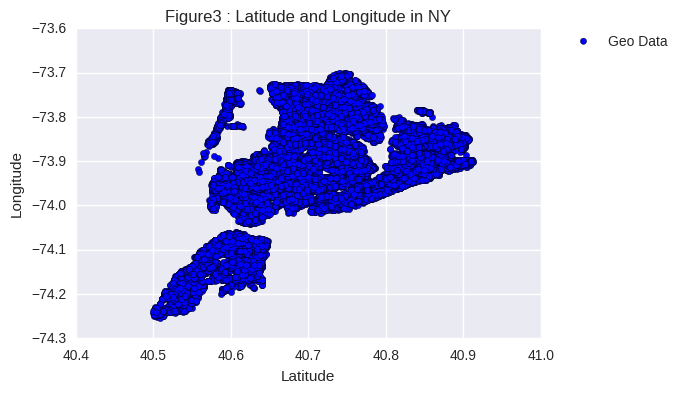

In [15]:
plt.title("Figure3 : Latitude and Longitude in NY")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.scatter(df_number["Latitude"],df_number["Longitude"],label = "Geo Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [16]:
df_time = df_time[["Created Date","Latitude","Longitude"]]

In [17]:
df_time.head()

,Created Date,Latitude,Longitude
0,08/10/2016 05:15:00 AM,NaN,NaN
1,08/11/2016 09:28:00 PM,40.762561,-73.917194
2,03/30/2012 03:43:00 PM,40.600945,-74.131174
3,10/04/2016 01:32:00 PM,40.599340,-73.934411
4,10/04/2016 08:27:00 AM,40.756363,-73.977852


In [31]:
df_time["Created Date"] = pd.to_datetime(df_time["Created Date"],format="%m/%d/%Y %H:%M:%S %p")
df_time["Created Date"].head()

0   2016-08-10 05:15:00
1   2016-08-11 09:28:00
2   2012-03-30 03:43:00
3   2016-10-04 01:32:00
4   2016-10-04 08:27:00
Name: Created Date, dtype: datetime64[ns]

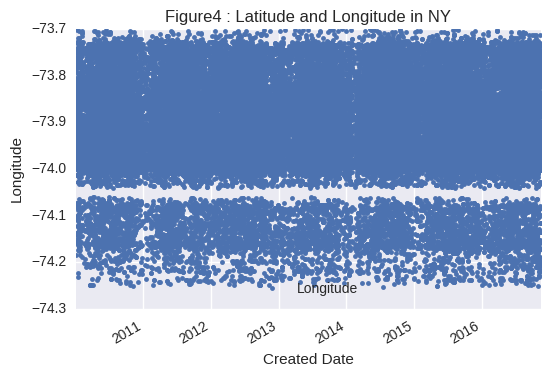

In [30]:
#plt.title("Figure3 : Latitude and Longitude in NY")
#plt.xlabel("Latitude")
#plt.ylabel("Longitude")
plot = df_time.plot(x="Created Date",y="Longitude", style=".")

plot.set_title("Figure4 : Latitude and Longitude in NY")
plot.set_ylabel("Longitude")    
plot
#plt.scatter(df_time["Created Date"],df_time["Longitude"],label = "Geo Data")
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)